<div class="alert alert-block alert-success">

# Visualización de datos

In [2]:
from datetime import datetime
from IPython.display import Image
import requests
import bs4
import pandas as pd
import os
from IPython.display import display
from urllib.parse import urlparse #proporciona funciones para manipular URLs y sus componentes, para descomponerlas o construirlas
import hashlib #Genera un hash para tener un numero unico
import re #Para trabajar con expresiones regulare
import nltk #Tokenizar,separar palabras dentro del título y nos permitirá contar la frecuencia de cuántas palabras existen 
from nltk.corpus import stopwords #Palabras que no añaden ningun tipo de informacion ejm el ,la , los...
import numpy as np
%matplotlib inline

import shutil

In [4]:
mainpath = "/Cursos/Python/Python/Scraping/WebScraping_Data_Ing"
filename_ElUniversal = "clean_eluniversal_2019_06_07_articles.csv"
filename_ElColombiano = "clean_elcolombiano_2020_08_20_articles.csv"

#fullpath = mainpath + "/" + filename
fullpath_Eluniversal = os.path.join(mainpath,filename_ElUniversal)
fullpath_ElColombiano = os.path.join(mainpath,filename_ElColombiano)

clean_eluniversal = pd.read_csv(fullpath_Eluniversal, encoding='utf-8')
clean_elcolombiano = pd.read_csv(fullpath_ElColombiano, encoding='utf-8')

In [5]:
display(clean_eluniversal.describe())
display(clean_elcolombiano.describe())

,n_tokens_body,n_tokens_title
count,137.000000,137.000000
mean,280.167883,5.423358
std,276.113163,1.643716
min,9.000000,1.000000
25%,119.000000,4.000000
50%,198.000000,5.000000
75%,302.000000,6.000000
max,2105.000000,10.000000


,n_tokens_body,n_tokens_title
count,31.000000,31.000000
mean,151.677419,5.096774
std,498.296524,1.325515
min,36.000000,3.000000
25%,38.500000,4.000000
50%,41.000000,5.000000
75%,43.500000,6.000000
max,2747.000000,8.000000


In [6]:
clean_eluniversal[clean_eluniversal['n_tokens_title'] == 1]

,uid,body,title,url,newspaper_uid,host,n_tokens_body,n_tokens_title
129,3e542ff3beadc7730bbe798190f3cf39,Toggle navigation SuscripcionesEl Universal ...,Suscripciones,https://www.clubeluniversal.mx/content/suscrip...,eluniversal,www.clubeluniversal.mx,9.0,1.0


<AxesSubplot:>

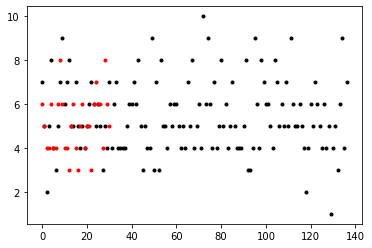

In [7]:
clean_eluniversal['n_tokens_title'].plot(style='k.') #K color negro "." significa que la grafica sea de punto
clean_elcolombiano['n_tokens_title'].plot(style='r.')

<AxesSubplot:>

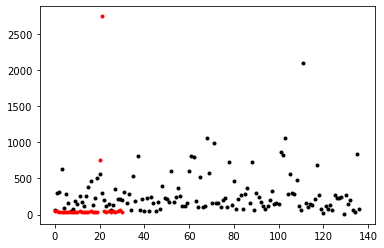

In [8]:
clean_eluniversal['n_tokens_body'].plot(style='k.') #K color negro "." significa que la grafica sea de punto
clean_elcolombiano['n_tokens_body'].plot(style='r.')

newspaper_uid
elcolombiano    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
eluniversal     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

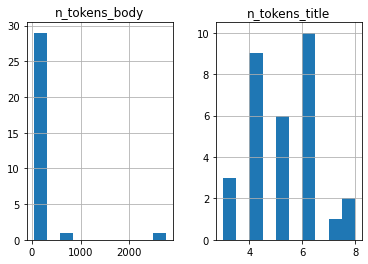

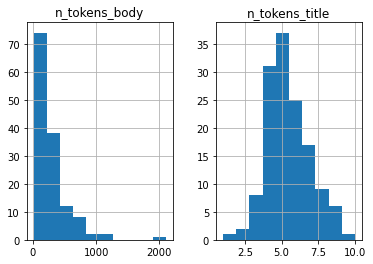

In [9]:
all_newspapers = pd.concat([clean_elcolombiano,clean_eluniversal])
grouped = all_newspapers.groupby('newspaper_uid')
grouped.hist()

In [10]:
grouped['n_tokens_body'].agg(['min','mean','max'])

,min,mean,max
newspaper_uid,,,
elcolombiano,36.0,151.677419,2747.0
eluniversal,9.0,280.167883,2105.0


newspaper_uid
elcolombiano    AxesSubplot(0.125,0.125;0.775x0.755)
eluniversal     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

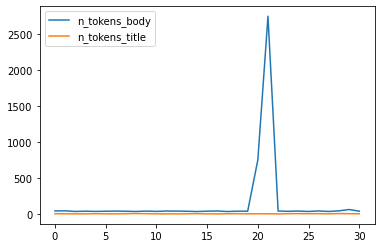

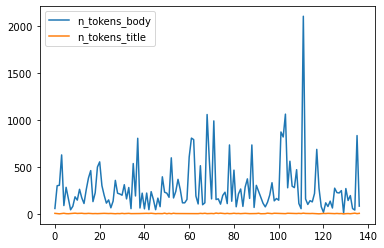

In [12]:
grouped.plot()

In [24]:
ruta=os.getcwd()

In [7]:
os.listdir('./extract')

['common.py',
 'config.yaml',
 'elcolombiano_2020_08_28_articles.csv',
 'main.py',
 'news_pages_objects.py',
 '__pycache__']

In [14]:
list(os.walk(ruta))[0]

('d:\\Cursos\\Python\\Python\\Scraping\\WebScraping_Data_Ing',
 ['.vscode', 'extract', 'load', 'transform', 'venv', '__pycache__'],
 ['clean_elcolombiano_2020_08_20_articles.csv',
  'clean_eluniversal_2019_06_07_articles.csv',
  'elcolombiano_2020_08_20_articles.csv',
  'eluniversal_2019_06_07_articles.csv',
  'newspaper.db',
  'pipeline.py',
  'requirements.txt',
  'WebScrapping.ipynb'])

In [27]:
os.path.join(str(os.getcwd),'\\extract')


'\\extract'

In [28]:
path = os.path.join(ruta,'/extract')
path 

'd:/extract'

In [29]:
TEST_FILENAME = os.path.join(os.path.dirname(__file__), 'test.txt')

NameError: name '__file__' is not defined

In [33]:
wk_dir = os.path.dirname(os.path.realpath('__file__'))
wk_dir
list(os.walk(wk_dir))[0]

('D:\\Cursos\\Python\\Python\\Scraping\\WebScraping_Data_Ing',
 ['.vscode', 'extract', 'load', 'transform', 'venv', '__pycache__'],
 ['clean_elcolombiano_2020_08_20_articles.csv',
  'clean_eluniversal_2019_06_07_articles.csv',
  'elcolombiano_2020_08_20_articles.csv',
  'eluniversal_2019_06_07_articles.csv',
  'newspaper.db',
  'pipeline.py',
  'requirements.txt',
  'WebScrapping.ipynb'])